### Analyzing, visualizing and predicting local states in localization problem
### Part-3: Predicting Q1 (or the first quantile or 25th percentile) of the local states
In this notebook we will use bidirectionl LSTM network for the prediction of Q1 at different timesteps of a localization problem.

#### Importing necessary packages

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


#### Loading the training and validation data

In [13]:
series = np.loadtxt('Data/Q1-13to2000grains.txt')
series

array([[ -85.82869792, -118.0196875 , -142.18375   , -161.47476042,
        -176.83854167, -189.231875  , -199.05949688, -207.43020833,
        -214.07760417, -219.41984375, -186.10077083, -152.00782917,
        -117.1546875 ,  -81.7296875 ,  -45.99497292,   -9.85147292,
          26.59275   ,   63.309     ,  100.09407292,  137.08458333],
       [ -52.4467    ,  -71.6579    ,  -85.7201    ,  -97.72125   ,
        -108.3475    , -117.847     , -126.6865    , -134.892     ,
        -142.598     , -149.91      , -119.4135    ,  -88.58285   ,
         -57.38385   ,  -25.7722    ,    6.425725  ,   38.9665    ,
          71.8439    ,  105.0205    ,  138.458     ,  172.285     ],
       [ -44.3425    ,  -62.0459375 ,  -74.6746875 ,  -84.90125   ,
         -93.4675    , -101.05625   , -107.9625    , -114.375     ,
        -120.475     , -126.2       ,  -94.3334375 ,  -62.2959375 ,
         -30.09      ,    2.39799062,   35.04      ,   67.77875   ,
         100.7625    ,  133.8875    ,  167.262

#### Visalization of the training set

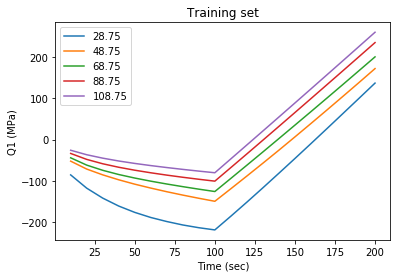

In [4]:
time=range(10,201,10)
plt.plot(time, series[0],  label='28.75')
plt.plot(time, series[1],  label='48.75')
plt.plot(time, series[2],  label='68.75')
plt.plot(time, series[3],  label='88.75')
plt.plot(time, series[4],  label='108.75')
#plt.plot(time, series[5],  label='128.75')
#plt.plot(time, series[6],  label='148.75')
#plt.plot(time, series[7],  label='168.75')
plt.xlabel('Time (sec)')
plt.ylabel('Q1 (MPa)')
plt.title('Training set')
plt.legend()

plt.show()

#### prepare the training Set for 2-to-1 bidirectional LSTM architecture

In [5]:
Xtrain=np.array([[series[0],series[1]],[series[1],series[2]],[series[2],series[3]]])
Ytrain = np.array([series[2],series[3],series[4]])
print(Xtrain)
print(Ytrain)

Xtrain.shape

[[[ -85.82869792 -118.0196875  -142.18375    -161.47476042 -176.83854167
   -189.231875   -199.05949688 -207.43020833 -214.07760417 -219.41984375
   -186.10077083 -152.00782917 -117.1546875   -81.7296875   -45.99497292
     -9.85147292   26.59275      63.309       100.09407292  137.08458333]
  [ -52.4467      -71.6579      -85.7201      -97.72125    -108.3475
   -117.847      -126.6865     -134.892      -142.598      -149.91
   -119.4135      -88.58285     -57.38385     -25.7722        6.425725
     38.9665       71.8439      105.0205      138.458       172.285     ]]

 [[ -52.4467      -71.6579      -85.7201      -97.72125    -108.3475
   -117.847      -126.6865     -134.892      -142.598      -149.91
   -119.4135      -88.58285     -57.38385     -25.7722        6.425725
     38.9665       71.8439      105.0205      138.458       172.285     ]
  [ -44.3425      -62.0459375   -74.6746875   -84.90125     -93.4675
   -101.05625    -107.9625     -114.375      -120.475      -126.2
    -94.

(3, 2, 20)

In [6]:
Xtrain.shape

(3, 2, 20)

#### Start training with 2-to-1, 2L, bidirectional LSTM with the 1st 5 sets 

In [23]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<.116 and logs.get('loss')>.112   ): #
      print("\nReached expected accuracy level, so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

#Activation function use na korle model diverge kore
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25,activation='relu',  return_sequences=True, input_shape=(2, 20))), #,dropout=0.05
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25, activation='relu')), #,dropout=0.05
    tf.keras.layers.Dense(units=20)
])

#model.summary()

adamOptimizer=keras.optimizers.Adam(lr=2.5e-2, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
MSE='mean_squared_error'
model.compile(optimizer=adamOptimizer, loss=MSE)
history = model.fit(Xtrain, Ytrain, epochs=1000, callbacks=[callbacks]) 

Train on 3 samples
Epoch 1/1000
3/3 [==============================] - 3s 1s/sample - loss: 11581.9023
Epoch 2/1000
3/3 [==============================] - 0s 6ms/sample - loss: 9943.0234
Epoch 3/1000
3/3 [==============================] - 0s 2ms/sample - loss: 5440.4927
Epoch 4/1000
3/3 [==============================] - 0s 3ms/sample - loss: 4378.7446
Epoch 5/1000
3/3 [==============================] - 0s 2ms/sample - loss: 2276.0908
Epoch 6/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2678.5090
Epoch 7/1000
3/3 [==============================] - 0s 2ms/sample - loss: 1282.2079
Epoch 8/1000
3/3 [==============================] - 0s 2ms/sample - loss: 1096.2740
Epoch 9/1000
3/3 [==============================] - 0s 5ms/sample - loss: 3686.4919
Epoch 10/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1938.9633
Epoch 11/1000
3/3 [==============================] - 0s 2ms/sample - loss: 1524.6442
Epoch 12/1000
3/3 [==============================] - 0s

Epoch 99/1000
3/3 [==============================] - 0s 3ms/sample - loss: 4.8496
Epoch 100/1000
3/3 [==============================] - 0s 3ms/sample - loss: 4.6165
Epoch 101/1000
3/3 [==============================] - 0s 3ms/sample - loss: 4.3758
Epoch 102/1000
3/3 [==============================] - 0s 3ms/sample - loss: 4.1364
Epoch 103/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.9007
Epoch 104/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.6825
Epoch 105/1000
3/3 [==============================] - 0s 4ms/sample - loss: 3.5128
Epoch 106/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.3681
Epoch 107/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.2515
Epoch 108/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.1814
Epoch 109/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.1276
Epoch 110/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.0781
Epoch

Epoch 198/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.4292
Epoch 199/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.4268
Epoch 200/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.4243
Epoch 201/1000
3/3 [==============================] - 0s 4ms/sample - loss: 2.4218
Epoch 202/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.4193
Epoch 203/1000
3/3 [==============================] - 0s 4ms/sample - loss: 2.4168
Epoch 204/1000
3/3 [==============================] - 0s 4ms/sample - loss: 2.4143
Epoch 205/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.4118
Epoch 206/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.4093
Epoch 207/1000
3/3 [==============================] - 0s 4ms/sample - loss: 2.4068
Epoch 208/1000
3/3 [==============================] - 0s 4ms/sample - loss: 2.4043
Epoch 209/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.4017
Epoc

Epoch 297/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.3834
Epoch 298/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.6859
Epoch 299/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.4325
Epoch 300/1000
3/3 [==============================] - 0s 4ms/sample - loss: 2.5445
Epoch 301/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.4693
Epoch 302/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.2895
Epoch 303/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.5208
Epoch 304/1000
3/3 [==============================] - 0s 4ms/sample - loss: 2.2232
Epoch 305/1000
3/3 [==============================] - 0s 5ms/sample - loss: 2.4301
Epoch 306/1000
3/3 [==============================] - 0s 4ms/sample - loss: 2.2707
Epoch 307/1000
3/3 [==============================] - 0s 4ms/sample - loss: 2.2681
Epoch 308/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.3456
Epoc

Epoch 396/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.8448
Epoch 397/1000
3/3 [==============================] - 0s 2ms/sample - loss: 1.8444
Epoch 398/1000
3/3 [==============================] - 0s 4ms/sample - loss: 1.8381
Epoch 399/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.8368
Epoch 400/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.8312
Epoch 401/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.8293
Epoch 402/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.8271
Epoch 403/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.8231
Epoch 404/1000
3/3 [==============================] - 0s 4ms/sample - loss: 1.8185
Epoch 405/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.8163
Epoch 406/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.8132
Epoch 407/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.8094
Epoc

Epoch 495/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.5045
Epoch 496/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.5015
Epoch 497/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.4964
Epoch 498/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.4938
Epoch 499/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.4899
Epoch 500/1000
3/3 [==============================] - 0s 4ms/sample - loss: 1.4907
Epoch 501/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.4851
Epoch 502/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.4795
Epoch 503/1000
3/3 [==============================] - 0s 4ms/sample - loss: 1.4760
Epoch 504/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.4736
Epoch 505/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.4693
Epoch 506/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.4735
Epoc

Epoch 594/1000
3/3 [==============================] - 0s 4ms/sample - loss: 1.1399
Epoch 595/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.1358
Epoch 596/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.1324
Epoch 597/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.1356
Epoch 598/1000
3/3 [==============================] - 0s 4ms/sample - loss: 1.1367
Epoch 599/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.1317
Epoch 600/1000
3/3 [==============================] - 0s 4ms/sample - loss: 1.1232
Epoch 601/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.1164
Epoch 602/1000
3/3 [==============================] - 0s 4ms/sample - loss: 1.1106
Epoch 603/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.1057
Epoch 604/1000
3/3 [==============================] - 0s 4ms/sample - loss: 1.1009
Epoch 605/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1.0976
Epoc

Epoch 693/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.8096
Epoch 694/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.7993
Epoch 695/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.8018
Epoch 696/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.8079
Epoch 697/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.8228
Epoch 698/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.8329
Epoch 699/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.8331
Epoch 700/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.8451
Epoch 701/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.8488
Epoch 702/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.8424
Epoch 703/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.8281
Epoch 704/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.8069
Epoc

Epoch 792/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.5775
Epoch 793/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.5548
Epoch 794/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.5546
Epoch 795/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.5640
Epoch 796/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.5587
Epoch 797/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.5480
Epoch 798/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.5416
Epoch 799/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.5412
Epoch 800/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.5342
Epoch 801/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.5422
Epoch 802/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.5318
Epoch 803/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.5224
Epoc

Epoch 891/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.3118
Epoch 892/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.3132
Epoch 893/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.3139
Epoch 894/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.3165
Epoch 895/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.3255
Epoch 896/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.3367
Epoch 897/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.3594
Epoch 898/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.3879
Epoch 899/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.4446
Epoch 900/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.5144
Epoch 901/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.6443
Epoch 902/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.7705
Epoc

Epoch 990/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.2141
Epoch 991/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.2325
Epoch 992/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.2353
Epoch 993/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.2644
Epoch 994/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.3047
Epoch 995/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.3613
Epoch 996/1000
3/3 [==============================] - 0s 5ms/sample - loss: 0.4424
Epoch 997/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.6225
Epoch 998/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.8683
Epoch 999/1000
3/3 [==============================] - 0s 4ms/sample - loss: 1.3947
Epoch 1000/1000
3/3 [==============================] - 0s 4ms/sample - loss: 1.9969


#### With the above training data, often we see overfitting, however, sometimes very good prediction, e.g. see the below prediction and compare

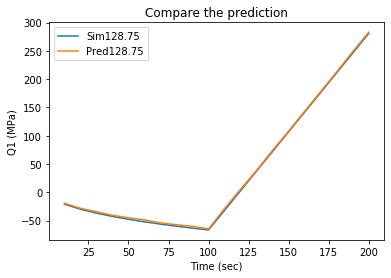

In [24]:
x4=np.array([[series[3],series[4]]])
y4=model.predict(x4)

time=range(10,201,10)

plt.plot(time, series[5],  label='Sim128.75')
plt.plot(time, y4[0],  label='Pred128.75')  


plt.xlabel('Time (sec)')
plt.ylabel('Q1 (MPa)')
plt.title('Compare the prediction')
plt.legend()

plt.show()

#### Lets have a look at losses

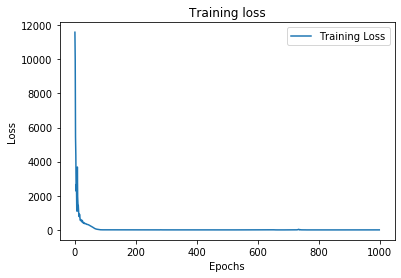

In [25]:
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs[0:], loss[0:],  label='Training Loss')
#plt.plot(epochs[0:], val_loss[0:],  label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')
plt.legend()

plt.show()

#### Compare the predicted 6th set with the real simulation data, value by value. It seems the error is negligible.

In [26]:
y4[0]

array([-19.283886 , -28.207365 , -34.368977 , -40.67858  , -45.068897 ,
       -48.7712   , -54.10753  , -57.33942  , -60.07338  , -64.83465  ,
       -28.651043 ,   5.4968557,  38.820335 ,  74.37094  , 108.32867  ,
       143.35114  , 178.24423  , 212.97168  , 248.94774  , 282.97287  ],
      dtype=float32)

In [27]:
series[5]

array([-20.9537 , -29.9288 , -36.825  , -42.61   , -47.6875 , -52.18   ,
       -56.2403 , -59.9087 , -63.3091 , -66.49   , -31.7675 ,   2.96309,
        37.6925 ,  72.3925 , 107.074  , 141.787  , 176.537  , 211.325  ,
       246.138  , 281.     ])

#### Include the predicted 6th set into the training data and retrain with the same architecture

In [52]:
Xtrain1=np.array([[series[0],series[1]],[series[1],series[2]],[series[2],series[3]],[series[3],series[4]]])
Ytrain1 = np.array([series[2],series[3],series[4],y4[0]])


#### In this case we see the similar training effect i.e. training is not smooth always, we need to train several times to get a closer prediction.

In [62]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<.12   ): #and logs.get('val_loss')<1
      print("\nReached expected accuracy level, so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

#Activation function use na korle model diverge kore
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,activation='relu', return_sequences=True, input_shape=(2, 20))),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, activation='relu')),  
    tf.keras.layers.Dense(units=20)
])

#model.summary()

adamOptimizer=keras.optimizers.Adam(lr=2.5e-2, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
MSE='mean_squared_error'
model.compile(optimizer=adamOptimizer, loss=MSE)
history = model.fit(Xtrain1, Ytrain1, epochs=1000, callbacks=[callbacks]) #, validation_data=(Xtest, Ytest)

Train on 4 samples
Epoch 1/1000
4/4 [==============================] - 3s 760ms/sample - loss: 12045.3379
Epoch 2/1000
4/4 [==============================] - 0s 2ms/sample - loss: 11020.3887
Epoch 3/1000
4/4 [==============================] - 0s 2ms/sample - loss: 7302.3086
Epoch 4/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4878.0234
Epoch 5/1000
4/4 [==============================] - 0s 3ms/sample - loss: 2439.2178
Epoch 6/1000
4/4 [==============================] - 0s 1ms/sample - loss: 1646.5883
Epoch 7/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1628.7000
Epoch 8/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1195.7585
Epoch 9/1000
4/4 [==============================] - 0s 2ms/sample - loss: 2161.1973
Epoch 10/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1931.6465
Epoch 11/1000
4/4 [==============================] - 0s 4ms/sample - loss: 1221.5457
Epoch 12/1000
4/4 [==============================] 

Epoch 99/1000
4/4 [==============================] - 0s 2ms/sample - loss: 15.5245
Epoch 100/1000
4/4 [==============================] - 0s 3ms/sample - loss: 14.6101
Epoch 101/1000
4/4 [==============================] - 0s 2ms/sample - loss: 13.7196
Epoch 102/1000
4/4 [==============================] - 0s 2ms/sample - loss: 12.9750
Epoch 103/1000
4/4 [==============================] - 0s 2ms/sample - loss: 12.4404
Epoch 104/1000
4/4 [==============================] - 0s 2ms/sample - loss: 11.9010
Epoch 105/1000
4/4 [==============================] - 0s 2ms/sample - loss: 11.4165
Epoch 106/1000
4/4 [==============================] - 0s 2ms/sample - loss: 11.0743
Epoch 107/1000
4/4 [==============================] - 0s 3ms/sample - loss: 10.7348
Epoch 108/1000
4/4 [==============================] - 0s 3ms/sample - loss: 10.4297
Epoch 109/1000
4/4 [==============================] - 0s 3ms/sample - loss: 10.2187
Epoch 110/1000
4/4 [==============================] - 0s 2ms/sample - loss: 9

Epoch 198/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.3782
Epoch 199/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.3600
Epoch 200/1000
4/4 [==============================] - 0s 3ms/sample - loss: 5.3420
Epoch 201/1000
4/4 [==============================] - 0s 3ms/sample - loss: 5.3243
Epoch 202/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.3068
Epoch 203/1000
4/4 [==============================] - 0s 3ms/sample - loss: 5.2895
Epoch 204/1000
4/4 [==============================] - 0s 3ms/sample - loss: 5.2745
Epoch 205/1000
4/4 [==============================] - 0s 3ms/sample - loss: 5.2678
Epoch 206/1000
4/4 [==============================] - 0s 3ms/sample - loss: 5.2616
Epoch 207/1000
4/4 [==============================] - 0s 3ms/sample - loss: 5.2557
Epoch 208/1000
4/4 [==============================] - 0s 3ms/sample - loss: 5.2500
Epoch 209/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.2444
Epoc

Epoch 297/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.8344
Epoch 298/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.8299
Epoch 299/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.8254
Epoch 300/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.8210
Epoch 301/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.8165
Epoch 302/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.8120
Epoch 303/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.8075
Epoch 304/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.8031
Epoch 305/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.7986
Epoch 306/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.7942
Epoch 307/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.7897
Epoch 308/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.7852
Epoc

Epoch 396/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.4088
Epoch 397/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.4047
Epoch 398/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.4006
Epoch 399/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.3966
Epoch 400/1000
4/4 [==============================] - 0s 4ms/sample - loss: 4.3925
Epoch 401/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.3884
Epoch 402/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.3844
Epoch 403/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.3804
Epoch 404/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.3763
Epoch 405/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.3722
Epoch 406/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.3682
Epoch 407/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.3642
Epoc

Epoch 495/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.0278
Epoch 496/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.0242
Epoch 497/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.0206
Epoch 498/1000
4/4 [==============================] - 0s 2ms/sample - loss: 4.0170
Epoch 499/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.0133
Epoch 500/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.0098
Epoch 501/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.0062
Epoch 502/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.0026
Epoch 503/1000
4/4 [==============================] - 0s 3ms/sample - loss: 3.9990
Epoch 504/1000
4/4 [==============================] - 0s 3ms/sample - loss: 3.9955
Epoch 505/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.9919
Epoch 506/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.9883
Epoc

Epoch 594/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.6923
Epoch 595/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.6891
Epoch 596/1000
4/4 [==============================] - 0s 3ms/sample - loss: 3.6860
Epoch 597/1000
4/4 [==============================] - 0s 4ms/sample - loss: 3.6828
Epoch 598/1000
4/4 [==============================] - 0s 3ms/sample - loss: 3.6796
Epoch 599/1000
4/4 [==============================] - 0s 4ms/sample - loss: 3.6765
Epoch 600/1000
4/4 [==============================] - 0s 3ms/sample - loss: 3.6733
Epoch 601/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.6702
Epoch 602/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.6670
Epoch 603/1000
4/4 [==============================] - 0s 3ms/sample - loss: 3.6639
Epoch 604/1000
4/4 [==============================] - 0s 3ms/sample - loss: 3.6608
Epoch 605/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.6576
Epoc

Epoch 693/1000
4/4 [==============================] - 0s 3ms/sample - loss: 3.3975
Epoch 694/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.3947
Epoch 695/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.3919
Epoch 696/1000
4/4 [==============================] - 0s 3ms/sample - loss: 3.3892
Epoch 697/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.3864
Epoch 698/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.3836
Epoch 699/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.3808
Epoch 700/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.3781
Epoch 701/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.3753
Epoch 702/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.3725
Epoch 703/1000
4/4 [==============================] - 0s 3ms/sample - loss: 3.3698
Epoch 704/1000
4/4 [==============================] - 0s 3ms/sample - loss: 3.3670
Epoc

Epoch 792/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.0463
Epoch 793/1000
4/4 [==============================] - 0s 2ms/sample - loss: 13.0542
Epoch 794/1000
4/4 [==============================] - 0s 3ms/sample - loss: 26.7597
Epoch 795/1000
4/4 [==============================] - 0s 4ms/sample - loss: 14.2815
Epoch 796/1000
4/4 [==============================] - 0s 3ms/sample - loss: 3.4326
Epoch 797/1000
4/4 [==============================] - 0s 2ms/sample - loss: 14.0464
Epoch 798/1000
4/4 [==============================] - 0s 3ms/sample - loss: 15.3417
Epoch 799/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.2723
Epoch 800/1000
4/4 [==============================] - 0s 2ms/sample - loss: 7.5758
Epoch 801/1000
4/4 [==============================] - 0s 2ms/sample - loss: 12.0279
Epoch 802/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.6703
Epoch 803/1000
4/4 [==============================] - 0s 3ms/sample - loss: 5.589

Epoch 891/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.0099
Epoch 892/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.0070
Epoch 893/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.0049
Epoch 894/1000
4/4 [==============================] - 0s 3ms/sample - loss: 3.0024
Epoch 895/1000
4/4 [==============================] - 0s 2ms/sample - loss: 2.9994
Epoch 896/1000
4/4 [==============================] - 0s 4ms/sample - loss: 2.9969
Epoch 897/1000
4/4 [==============================] - 0s 3ms/sample - loss: 2.9947
Epoch 898/1000
4/4 [==============================] - 0s 3ms/sample - loss: 2.9920
Epoch 899/1000
4/4 [==============================] - 0s 3ms/sample - loss: 2.9893
Epoch 900/1000
4/4 [==============================] - 0s 3ms/sample - loss: 2.9869
Epoch 901/1000
4/4 [==============================] - 0s 3ms/sample - loss: 2.9845
Epoch 902/1000
4/4 [==============================] - 0s 4ms/sample - loss: 2.9818
Epoc

Epoch 990/1000
4/4 [==============================] - 0s 2ms/sample - loss: 2.7725
Epoch 991/1000
4/4 [==============================] - 0s 4ms/sample - loss: 2.7702
Epoch 992/1000
4/4 [==============================] - 0s 3ms/sample - loss: 2.7679
Epoch 993/1000
4/4 [==============================] - 0s 2ms/sample - loss: 2.7657
Epoch 994/1000
4/4 [==============================] - 0s 3ms/sample - loss: 2.7634
Epoch 995/1000
4/4 [==============================] - 0s 4ms/sample - loss: 2.7612
Epoch 996/1000
4/4 [==============================] - 0s 3ms/sample - loss: 2.7589
Epoch 997/1000
4/4 [==============================] - 0s 3ms/sample - loss: 2.7567
Epoch 998/1000
4/4 [==============================] - 0s 2ms/sample - loss: 2.7544
Epoch 999/1000
4/4 [==============================] - 0s 4ms/sample - loss: 2.7522
Epoch 1000/1000
4/4 [==============================] - 0s 1ms/sample - loss: 2.7500


#### Lets compare the 7th set, prediction vs. simulation data

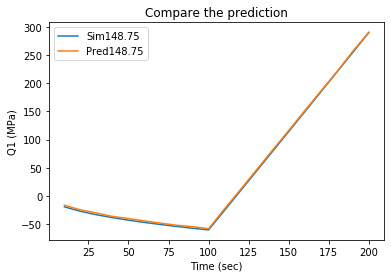

In [63]:
x5=np.array([[series[4],y4[0]]])
y5=model.predict(x5)

time=range(10,201,10)

plt.plot(time, series[6],  label='Sim148.75')
plt.plot(time, y5[0],  label='Pred148.75')

plt.xlabel('Time (sec)')
plt.ylabel('Q1 (MPa)')
plt.title('Compare the prediction')
plt.legend()

plt.show()

#### Training losses 

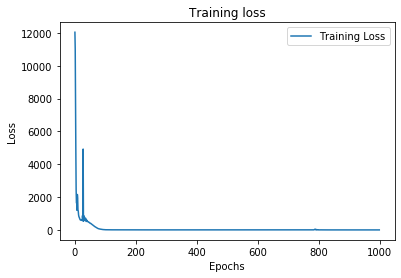

In [65]:
loss = history.history['loss']
epochs = range(len(loss))

plt.plot(epochs[0:], loss[0:],  label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')
plt.legend()

plt.show()

#### With the same procedure, lets train and predict the 8th set

In [66]:
Xtrain2=np.array([[series[0],series[1]],[series[1],series[2]],[series[2],series[3]],[series[3],series[4]],[series[4],y4[0]]])
Ytrain2 = np.array([series[2],series[3],series[4],y4[0],y5[0]])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<.12   ): #and logs.get('val_loss')<1
      print("\nReached expected accuracy level, so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

#Activation function use na korle model diverge kore
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,activation='relu', return_sequences=True, input_shape=(2, 20))),#
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, activation='relu')),  #
    tf.keras.layers.Dense(units=20)
])

#model.summary()

adamOptimizer=keras.optimizers.Adam(lr=2.5e-2, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
MSE='mean_squared_error'
model.compile(optimizer=adamOptimizer, loss=MSE)
history = model.fit(Xtrain2, Ytrain2, epochs=1000, callbacks=[callbacks]) #, validation_data=(Xtest, Ytest)



Train on 5 samples
Epoch 1/1000
5/5 [==============================] - 3s 692ms/sample - loss: 12459.1846
Epoch 2/1000
5/5 [==============================] - 0s 4ms/sample - loss: 11713.9736
Epoch 3/1000
5/5 [==============================] - 0s 2ms/sample - loss: 9172.2402
Epoch 4/1000
5/5 [==============================] - 0s 2ms/sample - loss: 7461.5078
Epoch 5/1000
5/5 [==============================] - 0s 2ms/sample - loss: 4788.1665
Epoch 6/1000
5/5 [==============================] - 0s 2ms/sample - loss: 2964.5151
Epoch 7/1000
5/5 [==============================] - 0s 2ms/sample - loss: 2047.1008
Epoch 8/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1510.2117
Epoch 9/1000
5/5 [==============================] - 0s 2ms/sample - loss: 2477.0413
Epoch 10/1000
5/5 [==============================] - 0s 1ms/sample - loss: 917.7461
Epoch 11/1000
5/5 [==============================] - 0s 1ms/sample - loss: 871.9103
Epoch 12/1000
5/5 [==============================] - 

5/5 [==============================] - 0s 2ms/sample - loss: 9.6033
Epoch 100/1000
5/5 [==============================] - 0s 2ms/sample - loss: 14.1102
Epoch 101/1000
5/5 [==============================] - 0s 2ms/sample - loss: 13.1969
Epoch 102/1000
5/5 [==============================] - 0s 2ms/sample - loss: 8.4103
Epoch 103/1000
5/5 [==============================] - 0s 3ms/sample - loss: 11.9626
Epoch 104/1000
5/5 [==============================] - 0s 2ms/sample - loss: 11.5419
Epoch 105/1000
5/5 [==============================] - 0s 2ms/sample - loss: 8.2941
Epoch 106/1000
5/5 [==============================] - 0s 2ms/sample - loss: 10.9947
Epoch 107/1000
5/5 [==============================] - 0s 2ms/sample - loss: 9.9869
Epoch 108/1000
5/5 [==============================] - 0s 2ms/sample - loss: 7.6749
Epoch 109/1000
5/5 [==============================] - 0s 2ms/sample - loss: 9.9449
Epoch 110/1000
5/5 [==============================] - 0s 2ms/sample - loss: 9.5105
Epoch 111/1000

Epoch 198/1000
5/5 [==============================] - 0s 2ms/sample - loss: 11.8828
Epoch 199/1000
5/5 [==============================] - 0s 2ms/sample - loss: 18.8280
Epoch 200/1000
5/5 [==============================] - 0s 2ms/sample - loss: 31.7503
Epoch 201/1000
5/5 [==============================] - 0s 2ms/sample - loss: 44.4902
Epoch 202/1000
5/5 [==============================] - 0s 2ms/sample - loss: 44.6985
Epoch 203/1000
5/5 [==============================] - 0s 2ms/sample - loss: 20.5824
Epoch 204/1000
5/5 [==============================] - 0s 2ms/sample - loss: 4.3943
Epoch 205/1000
5/5 [==============================] - 0s 3ms/sample - loss: 12.5785
Epoch 206/1000
5/5 [==============================] - 0s 3ms/sample - loss: 23.1100
Epoch 207/1000
5/5 [==============================] - 0s 2ms/sample - loss: 17.7286
Epoch 208/1000
5/5 [==============================] - 0s 2ms/sample - loss: 4.4447
Epoch 209/1000
5/5 [==============================] - 0s 2ms/sample - loss: 9.

Epoch 297/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.4786
Epoch 298/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.4615
Epoch 299/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.4463
Epoch 300/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.4339
Epoch 301/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.4245
Epoch 302/1000
5/5 [==============================] - 0s 6ms/sample - loss: 1.4089
Epoch 303/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.3947
Epoch 304/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.3840
Epoch 305/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.3702
Epoch 306/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.3559
Epoch 307/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.3401
Epoch 308/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.3342
Epoc

Epoch 396/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.7705
Epoch 397/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.6539
Epoch 398/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.6451
Epoch 399/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.7243
Epoch 400/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.7671
Epoch 401/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.7193
Epoch 402/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.6452
Epoch 403/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.6038
Epoch 404/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.6184
Epoch 405/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.6578
Epoch 406/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.6727
Epoch 407/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.6460
Epoc

Epoch 495/1000
5/5 [==============================] - 0s 3ms/sample - loss: 2.5739
Epoch 496/1000
5/5 [==============================] - 0s 2ms/sample - loss: 3.1456
Epoch 497/1000
5/5 [==============================] - 0s 2ms/sample - loss: 2.3786
Epoch 498/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.7851
Epoch 499/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.4557
Epoch 500/1000
5/5 [==============================] - 0s 1ms/sample - loss: 1.3985
Epoch 501/1000
5/5 [==============================] - 0s 1ms/sample - loss: 2.1682
Epoch 502/1000
5/5 [==============================] - 0s 2ms/sample - loss: 2.0446
Epoch 503/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.1033
Epoch 504/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.3909
Epoch 505/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.5966
Epoch 506/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.2130
Epoc

Epoch 594/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.3468
Epoch 595/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.4017
Epoch 596/1000
5/5 [==============================] - 0s 1ms/sample - loss: 0.4783
Epoch 597/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.5868
Epoch 598/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.7649
Epoch 599/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.0333
Epoch 600/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.4739
Epoch 601/1000
5/5 [==============================] - 0s 3ms/sample - loss: 2.0689
Epoch 602/1000
5/5 [==============================] - 0s 2ms/sample - loss: 3.1236
Epoch 603/1000
5/5 [==============================] - 0s 2ms/sample - loss: 4.6503
Epoch 604/1000
5/5 [==============================] - 0s 2ms/sample - loss: 7.4274
Epoch 605/1000
5/5 [==============================] - 0s 2ms/sample - loss: 10.6246
Epo

Epoch 693/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1698
Epoch 694/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1677
Epoch 695/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.1653
Epoch 696/1000
5/5 [==============================] - 0s 1ms/sample - loss: 0.1642
Epoch 697/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1646
Epoch 698/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1654
Epoch 699/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1654
Epoch 700/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1642
Epoch 701/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.1625
Epoch 702/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.1610
Epoch 703/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1602
Epoch 704/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1601
Epoc

Epoch 792/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.8962
Epoch 793/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.0279
Epoch 794/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.4632
Epoch 795/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.0904
Epoch 796/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.7150
Epoch 797/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.0443
Epoch 798/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.5939
Epoch 799/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.6346
Epoch 800/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.5596
Epoch 801/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.5499
Epoch 802/1000
5/5 [==============================] - 0s 662us/sample - loss: 0.6854
Epoch 803/1000
5/5 [==============================] - 0s 4ms/sample - loss: 0.5077
Ep

Epoch 891/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1323
Epoch 892/1000
5/5 [==============================] - 0s 1ms/sample - loss: 0.1320
Epoch 893/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1320
Epoch 894/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1318
Epoch 895/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1319
Epoch 896/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1328
Epoch 897/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1343
Epoch 898/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1370
Epoch 899/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1409
Epoch 900/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1472
Epoch 901/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1569
Epoch 902/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1725
Epoc

#### This time training process seems smooth and stable, reached the expected accuracy level. This is because the higher number of training dataset. Let's compare the 8th set, simulation vs prediction

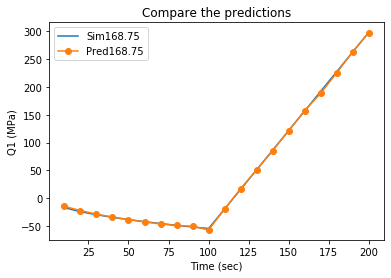

In [71]:
x6=np.array([[series[5],y5[0]]])
y6=model.predict(x6)

time=range(10,201,10)

#plt.plot(time, series[6],  label='Sim148.75')  
plt.plot(time, series[7],  label='Sim168.75')
#plt.plot(time, y5[0], 'o-', label='Pred148.75')
plt.plot(time, y6[0], 'o-', label='Pred168.75')
plt.xlabel('Time (sec)')
plt.ylabel('Q1 (MPa)')
plt.title('Compare the predictions')
plt.legend()

plt.show()

#### Even though the available training sets are very few (i.e. only 5), at the end we have been able to predict Q1 list for the 6th, 7th and 8th set. However, the training was not very smooth. 

#### In order to get a stable and smooth training process, we especially need high quality training data when the datasets are too small. To do so, we can preprocess tha training data. Lets observe the slopes of the linear part of each curve and the vertical distances in between.

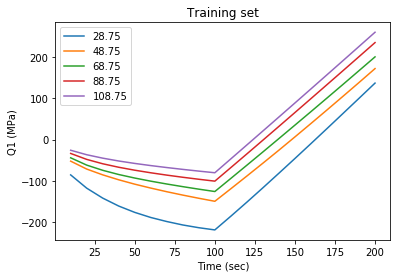

In [14]:
time=range(10,201,10)
plt.plot(time, series[0],  label='28.75')
plt.plot(time, series[1],  label='48.75')
plt.plot(time, series[2],  label='68.75')
plt.plot(time, series[3],  label='88.75')
plt.plot(time, series[4],  label='108.75')

plt.xlabel('Time (sec)')
plt.ylabel('Q1 (MPa)')
plt.title('Training set')
plt.legend()

plt.show()

#### Just observe the slopes of each curve

In [15]:
slope1=(series[0][10]-series[0][9])/10.0
slope2=(series[1][10]-series[1][9])/10.0
slope3=(series[2][10]-series[2][9])/10.0
slope4=(series[3][10]-series[3][9])/10.0
slope5=(series[4][10]-series[4][9])/10.0
#slope6=(series[5][10]-series[5][9])/10.0
#slope7=(series[6][10]-series[6][9])/10.0
#slope8=(series[7][10]-series[7][9])/10.0
print(slope1, slope2, slope3, slope4, slope5)
#print((slope1+slope2+slope3+slope4+slope5+slope6+slope7+slope8)/8)

3.331907291666724 3.0496499999999997 3.1866562500000013 3.298750000000001 3.372750000000001


#### If we rearrange the slopes with an increasing order and and redraw the linear parts then they will look like below: 

In [16]:
#To make a meaningful sequence, sloples sequence should be meaningful
#Rearranging slops as :slope2, slope3, slope4, slope1, slope5, slope6, ... for dataset 1, 2, 3, 4 ,.....
slope=[slope2, slope3, slope4, slope1]
for i in range(0,4):
    for j in range(10,20):
        series[i][j]=series[i][j-1]+slope[i]*10

        

#### Lets observe the training data again after rearrangement of slopes

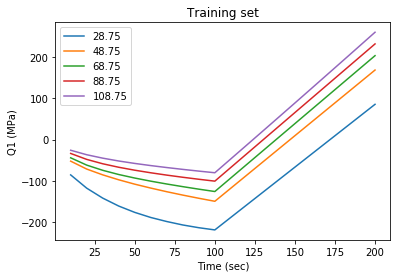

In [17]:
time=range(10,201,10)
plt.plot(time, series[0],  label='28.75')
plt.plot(time, series[1],  label='48.75')
plt.plot(time, series[2],  label='68.75')
plt.plot(time, series[3],  label='88.75')
plt.plot(time, series[4],  label='108.75')

plt.xlabel('Time (sec)')
plt.ylabel('Q1 (MPa)')
plt.title('Training set')
plt.legend()

plt.show()

#### Now if we move little the 2nd curve vertically, then the whole 5 set will show more sequencial order. Lets have a look again...

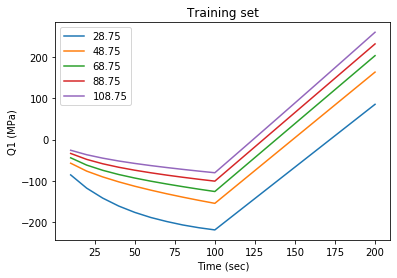

In [18]:
#second series ke ektu more sequencial korar chesta
series[1]=series[1]-5

time=range(10,201,10)
plt.plot(time, series[0],  label='28.75')
plt.plot(time, series[1],  label='48.75')
plt.plot(time, series[2],  label='68.75')
plt.plot(time, series[3],  label='88.75')
plt.plot(time, series[4],  label='108.75')

plt.xlabel('Time (sec)')
plt.ylabel('Q1 (MPa)')
plt.title('Training set')
plt.legend()

plt.show()

#### prepare the training Set for 2-to-1 bidirectional LSTM architecture

In [46]:
Xtrain=np.array([[series[0],series[1]],[series[1],series[2]],[series[2],series[3]]])
Ytrain = np.array([series[2],series[3],series[4]])
print(Xtrain)
print(Ytrain)

Xtrain.shape

[[[ -85.82869792 -118.0196875  -142.18375    -161.47476042 -176.83854167
   -189.231875   -199.05949688 -207.43020833 -214.07760417 -219.41984375
   -188.92334375 -158.42684375 -127.93034375  -97.43384375  -66.93734375
    -36.44084375   -5.94434375   24.55215625   55.04865625   85.54515625]
  [ -57.4467      -76.6579      -90.7201     -102.72125    -113.3475
   -122.847      -131.6865     -139.892      -147.598      -154.91
   -123.0434375   -91.176875    -59.3103125   -27.44375       4.4228125
     36.289375     68.1559375   100.0225      131.8890625   163.755625  ]]

 [[ -57.4467      -76.6579      -90.7201     -102.72125    -113.3475
   -122.847      -131.6865     -139.892      -147.598      -154.91
   -123.0434375   -91.176875    -59.3103125   -27.44375       4.4228125
     36.289375     68.1559375   100.0225      131.8890625   163.755625  ]
  [ -44.3425      -62.0459375   -74.6746875   -84.90125     -93.4675
   -101.05625    -107.9625     -114.375      -120.475      -126.2
    -9

(3, 2, 20)

In [47]:
Xtrain.shape

(3, 2, 20)

#### Lets train 2-to-1, 2L, bidirectional LSTM with preprocessed training data 

In [74]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<.12   ): #and logs.get('loss')>.112
      print("\nReached expected accuracy level, so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

#Activation function use na korle model diverge kore
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,activation='relu',  return_sequences=True, input_shape=(2, 20))), #,dropout=0.05
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, activation='relu')), #,dropout=0.05
    tf.keras.layers.Dense(units=20)
])

#model.summary()

adamOptimizer=keras.optimizers.Adam(lr=2.5e-2, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
MSE='mean_squared_error'
model.compile(optimizer=adamOptimizer, loss=MSE)
history = model.fit(Xtrain, Ytrain, epochs=1000, callbacks=[callbacks]) 

Train on 3 samples
Epoch 1/1000
3/3 [==============================] - 3s 977ms/sample - loss: 11191.3311
Epoch 2/1000
3/3 [==============================] - 0s 6ms/sample - loss: 10047.2129
Epoch 3/1000
3/3 [==============================] - 0s 3ms/sample - loss: 6600.6641
Epoch 4/1000
3/3 [==============================] - 0s 4ms/sample - loss: 6452.2954
Epoch 5/1000
3/3 [==============================] - 0s 3ms/sample - loss: 4754.4219
Epoch 6/1000
3/3 [==============================] - 0s 2ms/sample - loss: 2191.0608
Epoch 7/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1676.6544
Epoch 8/1000
3/3 [==============================] - 0s 2ms/sample - loss: 1299.3740
Epoch 9/1000
3/3 [==============================] - 0s 2ms/sample - loss: 1050.5079
Epoch 10/1000
3/3 [==============================] - 0s 3ms/sample - loss: 838.0031
Epoch 11/1000
3/3 [==============================] - 0s 2ms/sample - loss: 764.5026
Epoch 12/1000
3/3 [==============================] - 

Epoch 99/1000
3/3 [==============================] - 0s 3ms/sample - loss: 315.7256
Epoch 100/1000
3/3 [==============================] - 0s 3ms/sample - loss: 315.7231
Epoch 101/1000
3/3 [==============================] - 0s 3ms/sample - loss: 315.7124
Epoch 102/1000
3/3 [==============================] - 0s 3ms/sample - loss: 315.7107
Epoch 103/1000
3/3 [==============================] - 0s 5ms/sample - loss: 315.7045
Epoch 104/1000
3/3 [==============================] - 0s 3ms/sample - loss: 315.7036
Epoch 105/1000
3/3 [==============================] - 0s 3ms/sample - loss: 315.6998
Epoch 106/1000
3/3 [==============================] - 0s 3ms/sample - loss: 315.6982
Epoch 107/1000
3/3 [==============================] - 0s 5ms/sample - loss: 315.6934
Epoch 108/1000
3/3 [==============================] - 0s 4ms/sample - loss: 315.6887
Epoch 109/1000
3/3 [==============================] - 0s 3ms/sample - loss: 315.6817
Epoch 110/1000
3/3 [==============================] - 0s 3ms/sampl

Epoch 196/1000
3/3 [==============================] - 0s 3ms/sample - loss: 315.2626
Epoch 197/1000
3/3 [==============================] - 0s 3ms/sample - loss: 315.2558
Epoch 198/1000
3/3 [==============================] - 0s 3ms/sample - loss: 315.2488
Epoch 199/1000
3/3 [==============================] - 0s 4ms/sample - loss: 315.2419
Epoch 200/1000
3/3 [==============================] - 0s 3ms/sample - loss: 315.2348
Epoch 201/1000
3/3 [==============================] - 0s 4ms/sample - loss: 315.2277
Epoch 202/1000
3/3 [==============================] - 0s 3ms/sample - loss: 315.2204
Epoch 203/1000
3/3 [==============================] - 0s 3ms/sample - loss: 315.2131
Epoch 204/1000
3/3 [==============================] - 0s 4ms/sample - loss: 315.2057
Epoch 205/1000
3/3 [==============================] - 0s 3ms/sample - loss: 315.1982
Epoch 206/1000
3/3 [==============================] - 0s 3ms/sample - loss: 315.1906
Epoch 207/1000
3/3 [==============================] - 0s 3ms/samp

Epoch 293/1000
3/3 [==============================] - 0s 4ms/sample - loss: 314.0419
Epoch 294/1000
3/3 [==============================] - 0s 4ms/sample - loss: 314.0183
Epoch 295/1000
3/3 [==============================] - 0s 3ms/sample - loss: 313.9941
Epoch 296/1000
3/3 [==============================] - 0s 5ms/sample - loss: 313.9694
Epoch 297/1000
3/3 [==============================] - 0s 4ms/sample - loss: 313.9442
Epoch 298/1000
3/3 [==============================] - 0s 4ms/sample - loss: 313.9186
Epoch 299/1000
3/3 [==============================] - 0s 4ms/sample - loss: 313.8922
Epoch 300/1000
3/3 [==============================] - 0s 4ms/sample - loss: 313.8654
Epoch 301/1000
3/3 [==============================] - 0s 3ms/sample - loss: 313.8379
Epoch 302/1000
3/3 [==============================] - 0s 4ms/sample - loss: 313.8098
Epoch 303/1000
3/3 [==============================] - 0s 3ms/sample - loss: 313.7810
Epoch 304/1000
3/3 [==============================] - 0s 4ms/samp

Epoch 390/1000
3/3 [==============================] - 0s 4ms/sample - loss: 313.8439
Epoch 391/1000
3/3 [==============================] - 0s 4ms/sample - loss: 314.4159
Epoch 392/1000
3/3 [==============================] - 0s 4ms/sample - loss: 314.0373
Epoch 393/1000
3/3 [==============================] - 0s 4ms/sample - loss: 313.9822
Epoch 394/1000
3/3 [==============================] - 0s 3ms/sample - loss: 314.2344
Epoch 395/1000
3/3 [==============================] - 0s 4ms/sample - loss: 313.7836
Epoch 396/1000
3/3 [==============================] - 0s 4ms/sample - loss: 314.1158
Epoch 397/1000
3/3 [==============================] - 0s 3ms/sample - loss: 313.9088
Epoch 398/1000
3/3 [==============================] - 0s 3ms/sample - loss: 313.8293
Epoch 399/1000
3/3 [==============================] - 0s 4ms/sample - loss: 314.0099
Epoch 400/1000
3/3 [==============================] - 0s 3ms/sample - loss: 313.7264
Epoch 401/1000
3/3 [==============================] - 0s 3ms/samp

Epoch 487/1000
3/3 [==============================] - 0s 3ms/sample - loss: 312.0228
Epoch 488/1000
3/3 [==============================] - 0s 4ms/sample - loss: 311.9930
Epoch 489/1000
3/3 [==============================] - 0s 3ms/sample - loss: 311.9626
Epoch 490/1000
3/3 [==============================] - 0s 4ms/sample - loss: 311.9320
Epoch 491/1000
3/3 [==============================] - 0s 4ms/sample - loss: 311.9010
Epoch 492/1000
3/3 [==============================] - 0s 4ms/sample - loss: 311.8697
Epoch 493/1000
3/3 [==============================] - 0s 3ms/sample - loss: 311.8379
Epoch 494/1000
3/3 [==============================] - 0s 5ms/sample - loss: 311.8057
Epoch 495/1000
3/3 [==============================] - 0s 3ms/sample - loss: 311.7732
Epoch 496/1000
3/3 [==============================] - 0s 4ms/sample - loss: 311.7402
Epoch 497/1000
3/3 [==============================] - 0s 3ms/sample - loss: 311.7068
Epoch 498/1000
3/3 [==============================] - 0s 4ms/samp

Epoch 584/1000
3/3 [==============================] - 0s 4ms/sample - loss: 306.0429
Epoch 585/1000
3/3 [==============================] - 0s 3ms/sample - loss: 305.9057
Epoch 586/1000
3/3 [==============================] - 0s 2ms/sample - loss: 305.7683
Epoch 587/1000
3/3 [==============================] - 0s 4ms/sample - loss: 305.6269
Epoch 588/1000
3/3 [==============================] - 0s 3ms/sample - loss: 305.4827
Epoch 589/1000
3/3 [==============================] - 0s 4ms/sample - loss: 305.3359
Epoch 590/1000
3/3 [==============================] - 0s 3ms/sample - loss: 305.1836
Epoch 591/1000
3/3 [==============================] - 0s 3ms/sample - loss: 305.0289
Epoch 592/1000
3/3 [==============================] - 0s 3ms/sample - loss: 304.8708
Epoch 593/1000
3/3 [==============================] - 0s 3ms/sample - loss: 304.7092
Epoch 594/1000
3/3 [==============================] - 0s 3ms/sample - loss: 304.5421
Epoch 595/1000
3/3 [==============================] - 0s 3ms/samp

Epoch 681/1000
3/3 [==============================] - 0s 3ms/sample - loss: 255.2466
Epoch 682/1000
3/3 [==============================] - 0s 3ms/sample - loss: 319.1172
Epoch 683/1000
3/3 [==============================] - 0s 3ms/sample - loss: 268.6262
Epoch 684/1000
3/3 [==============================] - 0s 4ms/sample - loss: 277.5926
Epoch 685/1000
3/3 [==============================] - 0s 2ms/sample - loss: 274.4016
Epoch 686/1000
3/3 [==============================] - 0s 3ms/sample - loss: 279.3075
Epoch 687/1000
3/3 [==============================] - 0s 5ms/sample - loss: 253.3342
Epoch 688/1000
3/3 [==============================] - 0s 3ms/sample - loss: 264.6599
Epoch 689/1000
3/3 [==============================] - 0s 4ms/sample - loss: 259.3346
Epoch 690/1000
3/3 [==============================] - 0s 3ms/sample - loss: 244.4830
Epoch 691/1000
3/3 [==============================] - 0s 3ms/sample - loss: 256.1441
Epoch 692/1000
3/3 [==============================] - 0s 3ms/samp

Epoch 778/1000
3/3 [==============================] - 0s 4ms/sample - loss: 38.5328
Epoch 779/1000
3/3 [==============================] - 0s 4ms/sample - loss: 41.8084
Epoch 780/1000
3/3 [==============================] - 0s 3ms/sample - loss: 30.8114
Epoch 781/1000
3/3 [==============================] - 0s 3ms/sample - loss: 15.9869
Epoch 782/1000
3/3 [==============================] - 0s 3ms/sample - loss: 18.4175
Epoch 783/1000
3/3 [==============================] - 0s 3ms/sample - loss: 29.8983
Epoch 784/1000
3/3 [==============================] - 0s 4ms/sample - loss: 29.7148
Epoch 785/1000
3/3 [==============================] - 0s 3ms/sample - loss: 21.3733
Epoch 786/1000
3/3 [==============================] - 0s 3ms/sample - loss: 12.7298
Epoch 787/1000
3/3 [==============================] - 0s 3ms/sample - loss: 13.7090
Epoch 788/1000
3/3 [==============================] - 0s 3ms/sample - loss: 20.4400
Epoch 789/1000
3/3 [==============================] - 0s 4ms/sample - loss: 

Epoch 877/1000
3/3 [==============================] - 0s 4ms/sample - loss: 3.8576
Epoch 878/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.6285
Epoch 879/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.8323
Epoch 880/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.8906
Epoch 881/1000
3/3 [==============================] - 0s 4ms/sample - loss: 3.6578
Epoch 882/1000
3/3 [==============================] - 0s 4ms/sample - loss: 3.6297
Epoch 883/1000
3/3 [==============================] - 0s 4ms/sample - loss: 3.7846
Epoch 884/1000
3/3 [==============================] - 0s 4ms/sample - loss: 3.7281
Epoch 885/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.5799
Epoch 886/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.6337
Epoch 887/1000
3/3 [==============================] - 0s 4ms/sample - loss: 3.7115
Epoch 888/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.6198
Epoc

Epoch 976/1000
3/3 [==============================] - 0s 4ms/sample - loss: 3.3221
Epoch 977/1000
3/3 [==============================] - 0s 4ms/sample - loss: 3.3196
Epoch 978/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.3170
Epoch 979/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.3144
Epoch 980/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.3119
Epoch 981/1000
3/3 [==============================] - 0s 4ms/sample - loss: 3.3093
Epoch 982/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.3067
Epoch 983/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.3040
Epoch 984/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.3014
Epoch 985/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.2988
Epoch 986/1000
3/3 [==============================] - 0s 4ms/sample - loss: 3.2962
Epoch 987/1000
3/3 [==============================] - 0s 3ms/sample - loss: 3.2935
Epoc

#### Even though the loss (MSE) did not go below 3,  the prediction seem very good for the 6th set 

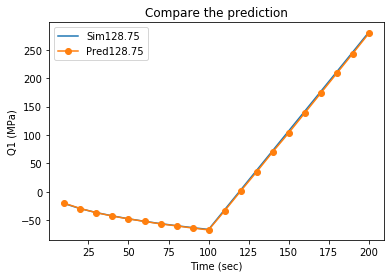

In [119]:
x4=np.array([[series[3],series[4]]])
y4=model.predict(x4)

time=range(10,201,10)

#plt.plot(time, series[2],  label='68.75')
#plt.plot(time, series[3],  label='88.75')
#plt.plot(time, series[4],  label='108.75')
plt.plot(time, series[5],  label='Sim128.75')
plt.plot(time, y4[0], 'o-', label='Pred128.75')  
#plt.plot(time, pred168_75[0],  label='Pred168.75')

plt.xlabel('Time (sec)')
plt.ylabel('Q1 (MPa)')
plt.title('Compare the prediction')
plt.legend()

plt.show()

#### Observe the losses

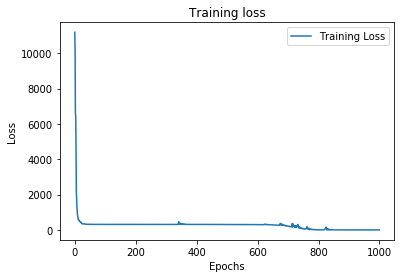

In [76]:
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs[0:], loss[0:],  label='Training Loss')
#plt.plot(epochs[0:], val_loss[0:],  label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')
plt.legend()

plt.show()

#### Lets compare number by number, looks great.

In [77]:
y4[0]

array([-20.732763 , -29.801283 , -36.78807  , -42.958725 , -48.0219   ,
       -52.70117  , -57.044415 , -60.23076  , -64.601135 , -67.41323  ,
       -33.87511  ,   0.5805789,  34.714417 ,  69.36799  , 103.19185  ,
       137.86504  , 172.77664  , 207.64314  , 242.62953  , 277.9048   ],
      dtype=float32)

In [78]:
series[5]

array([-20.9537 , -29.9288 , -36.825  , -42.61   , -47.6875 , -52.18   ,
       -56.2403 , -59.9087 , -63.3091 , -66.49   , -31.7675 ,   2.96309,
        37.6925 ,  72.3925 , 107.074  , 141.787  , 176.537  , 211.325  ,
       246.138  , 281.     ])

#### Lets continue further training and prediction

In [98]:
Xtrain1=np.array([[series[0],series[1]],[series[1],series[2]],[series[2],series[3]],[series[3],series[4]]])
Ytrain1 = np.array([series[2],series[3],series[4],y4[0]])


In [99]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<.12  ): #and logs.get('val_loss')<1
      print("\nReached expected accuracy level, so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

#Activation function use na korle model diverge kore
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,activation='relu', return_sequences=True, input_shape=(2, 20))),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, activation='relu')),  
    tf.keras.layers.Dense(units=20)
])

#model.summary()

adamOptimizer=keras.optimizers.Adam(lr=2.5e-2, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
MSE='mean_squared_error'
model.compile(optimizer=adamOptimizer, loss=MSE)
history = model.fit(Xtrain1, Ytrain1, epochs=1000, callbacks=[callbacks]) #, validation_data=(Xtest, Ytest)

Train on 4 samples
Epoch 1/1000
4/4 [==============================] - 3s 816ms/sample - loss: 11326.6504
Epoch 2/1000
4/4 [==============================] - 0s 2ms/sample - loss: 9977.7734
Epoch 3/1000
4/4 [==============================] - 0s 2ms/sample - loss: 6654.0020
Epoch 4/1000
4/4 [==============================] - 0s 3ms/sample - loss: 5499.8477
Epoch 5/1000
4/4 [==============================] - 0s 3ms/sample - loss: 5319.0493
Epoch 6/1000
4/4 [==============================] - 0s 3ms/sample - loss: 2434.5212
Epoch 7/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1362.0778
Epoch 8/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1111.1003
Epoch 9/1000
4/4 [==============================] - 0s 2ms/sample - loss: 961.1189
Epoch 10/1000
4/4 [==============================] - 0s 1ms/sample - loss: 1184.8732
Epoch 11/1000
4/4 [==============================] - 0s 3ms/sample - loss: 944.7203
Epoch 12/1000
4/4 [==============================] - 0

Epoch 99/1000
4/4 [==============================] - 0s 3ms/sample - loss: 329.8893
Epoch 100/1000
4/4 [==============================] - 0s 2ms/sample - loss: 322.1284
Epoch 101/1000
4/4 [==============================] - 0s 3ms/sample - loss: 308.2274
Epoch 102/1000
4/4 [==============================] - 0s 2ms/sample - loss: 297.1271
Epoch 103/1000
4/4 [==============================] - 0s 2ms/sample - loss: 283.5706
Epoch 104/1000
4/4 [==============================] - 0s 4ms/sample - loss: 269.4898
Epoch 105/1000
4/4 [==============================] - 0s 3ms/sample - loss: 255.5916
Epoch 106/1000
4/4 [==============================] - 0s 3ms/sample - loss: 240.3298
Epoch 107/1000
4/4 [==============================] - 0s 3ms/sample - loss: 224.7345
Epoch 108/1000
4/4 [==============================] - 0s 2ms/sample - loss: 209.1411
Epoch 109/1000
4/4 [==============================] - 0s 3ms/sample - loss: 194.3641
Epoch 110/1000
4/4 [==============================] - 0s 2ms/sampl

4/4 [==============================] - 0s 2ms/sample - loss: 1.0971
Epoch 198/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0912
Epoch 199/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.0904
Epoch 200/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.0942
Epoch 201/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0839
Epoch 202/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0925
Epoch 203/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0888
Epoch 204/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0797
Epoch 205/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0877
Epoch 206/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0809
Epoch 207/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.0763
Epoch 208/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.0800
Epoch 209/1000
4/4 

Epoch 296/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0518
Epoch 297/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0446
Epoch 298/1000
4/4 [==============================] - 0s 4ms/sample - loss: 1.0427
Epoch 299/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.0464
Epoch 300/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.0431
Epoch 301/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0410
Epoch 302/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0427
Epoch 303/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0418
Epoch 304/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.0401
Epoch 305/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.0401
Epoch 306/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0405
Epoch 307/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.0398
Epoc

Epoch 395/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.0095
Epoch 396/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.0093
Epoch 397/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0090
Epoch 398/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0087
Epoch 399/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0083
Epoch 400/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0079
Epoch 401/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0075
Epoch 402/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0071
Epoch 403/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0067
Epoch 404/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.0063
Epoch 405/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.0059
Epoch 406/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0055
Epoc

Epoch 494/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0293
Epoch 495/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.0035
Epoch 496/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.9819
Epoch 497/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.9723
Epoch 498/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.9751
Epoch 499/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.9855
Epoch 500/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.9966
Epoch 501/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0039
Epoch 502/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.0247
Epoch 503/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.0412
Epoch 504/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.0979
Epoch 505/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.1528
Epoc

Epoch 593/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.9293
Epoch 594/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.9284
Epoch 595/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.9275
Epoch 596/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.9271
Epoch 597/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.9270
Epoch 598/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.9269
Epoch 599/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.9263
Epoch 600/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.9256
Epoch 601/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.9250
Epoch 602/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.9247
Epoch 603/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.9245
Epoch 604/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.9242
Epoc

Epoch 692/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.9125
Epoch 693/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.8976
Epoch 694/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.9716
Epoch 695/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0582
Epoch 696/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0910
Epoch 697/1000
4/4 [==============================] - 0s 4ms/sample - loss: 1.0480
Epoch 698/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.9981
Epoch 699/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.9313
Epoch 700/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.8909
Epoch 701/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.8936
Epoch 702/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.9253
Epoch 703/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.9565
Epoc

Epoch 791/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.8547
Epoch 792/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.8649
Epoch 793/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.8847
Epoch 794/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.9463
Epoch 795/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0566
Epoch 796/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.3918
Epoch 797/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.9620
Epoch 798/1000
4/4 [==============================] - 0s 3ms/sample - loss: 3.6747
Epoch 799/1000
4/4 [==============================] - 0s 3ms/sample - loss: 6.2624
Epoch 800/1000
4/4 [==============================] - 0s 2ms/sample - loss: 13.3740
Epoch 801/1000
4/4 [==============================] - 0s 3ms/sample - loss: 19.1880
Epoch 802/1000
4/4 [==============================] - 0s 3ms/sample - loss: 28.4142
E

Epoch 890/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7910
Epoch 891/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7908
Epoch 892/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7900
Epoch 893/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7900
Epoch 894/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7899
Epoch 895/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7893
Epoch 896/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7891
Epoch 897/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7889
Epoch 898/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7884
Epoch 899/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7881
Epoch 900/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7880
Epoch 901/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7875
Epoc

Epoch 989/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7608
Epoch 990/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7604
Epoch 991/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7601
Epoch 992/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7598
Epoch 993/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7595
Epoch 994/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7592
Epoch 995/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7589
Epoch 996/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7586
Epoch 997/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7583
Epoch 998/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7580
Epoch 999/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7580
Epoch 1000/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7583


#### The prediction of 7th set also looks nice

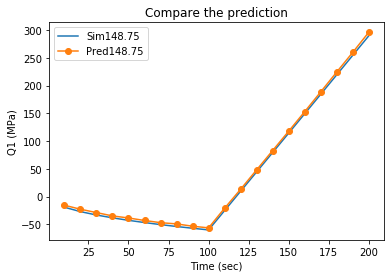

In [120]:
x5=np.array([[series[4],y4[0]]])
y5=model.predict(x5)

time=range(10,201,10)

plt.plot(time, series[6],  label='Sim148.75')
plt.plot(time, y5[0], 'o-', label='Pred148.75')

plt.xlabel('Time (sec)')
plt.ylabel('Q1 (MPa)')
plt.title('Compare the prediction')
plt.legend()

plt.show()

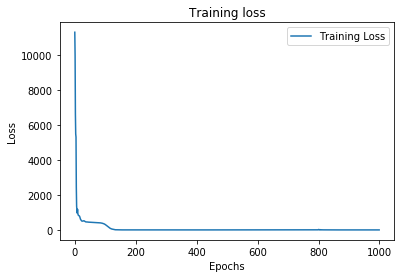

In [102]:
loss = history.history['loss']
epochs = range(len(loss))

plt.plot(epochs[0:], loss[0:],  label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')
plt.legend()

plt.show()

#### Retrain the network and predict the 8th set..

In [116]:
Xtrain2=np.array([[series[0],series[1]],[series[1],series[2]],[series[2],series[3]],[series[3],series[4]],[series[4],y4[0]]])
Ytrain2 = np.array([series[2],series[3],series[4],y4[0],y5[0]])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<.12   ): #and logs.get('val_loss')<1
      print("\nReached expected accuracy level, so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

#Activation function use na korle model diverge kore
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,activation='relu', return_sequences=True, input_shape=(2, 20))),#
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, activation='relu')),  #
    tf.keras.layers.Dense(units=20)
])

#model.summary()

adamOptimizer=keras.optimizers.Adam(lr=2.5e-2, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
MSE='mean_squared_error'
model.compile(optimizer=adamOptimizer, loss=MSE)
history = model.fit(Xtrain2, Ytrain2, epochs=1000, callbacks=[callbacks]) #, validation_data=(Xtest, Ytest)



Train on 5 samples
Epoch 1/1000
5/5 [==============================] - 3s 565ms/sample - loss: 13192.0654
Epoch 2/1000
5/5 [==============================] - 0s 3ms/sample - loss: 10566.0332
Epoch 3/1000
5/5 [==============================] - 0s 2ms/sample - loss: 7020.7827
Epoch 4/1000
5/5 [==============================] - 0s 3ms/sample - loss: 5679.2954
Epoch 5/1000
5/5 [==============================] - 0s 3ms/sample - loss: 3896.4819
Epoch 6/1000
5/5 [==============================] - 0s 1ms/sample - loss: 2775.3726
Epoch 7/1000
5/5 [==============================] - 0s 2ms/sample - loss: 2365.4604
Epoch 8/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1392.1912
Epoch 9/1000
5/5 [==============================] - 0s 3ms/sample - loss: 3019.1243
Epoch 10/1000
5/5 [==============================] - 0s 1ms/sample - loss: 1577.3929
Epoch 11/1000
5/5 [==============================] - 0s 2ms/sample - loss: 854.0278
Epoch 12/1000
5/5 [==============================] -

Epoch 100/1000
5/5 [==============================] - 0s 1ms/sample - loss: 1.1781
Epoch 101/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.1425
Epoch 102/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.0943
Epoch 103/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.0879
Epoch 104/1000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0515
Epoch 105/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.0392
Epoch 106/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.0054
Epoch 107/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.9930
Epoch 108/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.9602
Epoch 109/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.9400
Epoch 110/1000
5/5 [==============================] - 0s 1ms/sample - loss: 0.9057
Epoch 111/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.8929
Epoc

Epoch 199/1000
5/5 [==============================] - 0s 4ms/sample - loss: 0.2603
Epoch 200/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2551
Epoch 201/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2502
Epoch 202/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2473
Epoch 203/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2453
Epoch 204/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2432
Epoch 205/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2439
Epoch 206/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2443
Epoch 207/1000
5/5 [==============================] - 0s 5ms/sample - loss: 0.2478
Epoch 208/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2489
Epoch 209/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2556
Epoch 210/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.2562
Epoc

Epoch 298/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2698
Epoch 299/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2796
Epoch 300/1000
5/5 [==============================] - 0s 4ms/sample - loss: 0.1996
Epoch 301/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2401
Epoch 302/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2564
Epoch 303/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2175
Epoch 304/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2097
Epoch 305/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2167
Epoch 306/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2329
Epoch 307/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1868
Epoch 308/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1931
Epoch 309/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.1980
Epoc

#### The last predicted set also looks good. The traning is very smooth and stable with preprocessed data.

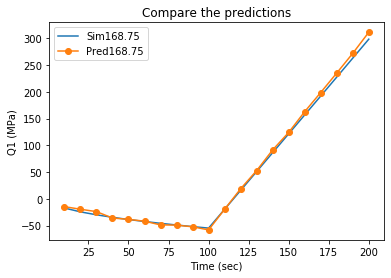

In [117]:
x6=np.array([[series[5],y5[0]]])
y6=model.predict(x6)

time=range(10,201,10)

#plt.plot(time, series[6],  label='Sim148.75')  
plt.plot(time, series[7],  label='Sim168.75')
#plt.plot(time, y5[0], 'o-', label='Pred148.75')
plt.plot(time, y6[0], 'o-', label='Pred168.75')
plt.xlabel('Time (sec)')
plt.ylabel('Q1 (MPa)')
plt.title('Compare the predictions')
plt.legend()

plt.show()

#### The central point of this notebook is that we are able to predict Q1 for a SERVE with LSTM network, without facing heavy computations.